In [73]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.discrete.discrete_model as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Marketing-Customer-Value-Analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## Data Analysis and Visualization

In [5]:
# Encode the responses 
df['Engaged'] = df['Response'].apply(lambda x: 0 if x=='No' else 1)

In [48]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Engaged'],
      dtype='object')

In [8]:
# Calculate engagement rate 
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response']/df.shape[0]* 100.0
)

In [9]:
engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [10]:
# Make it easier to read
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


In [11]:
# Exploring the Sales Channels
engagement_by_sales_channel_df = pd.pivot_table(
df, values='Response', index='Sales Channel', columns='Engaged', aggfunc=len).fillna(0)

In [13]:
# Rename the columns
engagement_by_sales_channel_df.columns =['Not Engaged', 'Engaged']

In [14]:
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


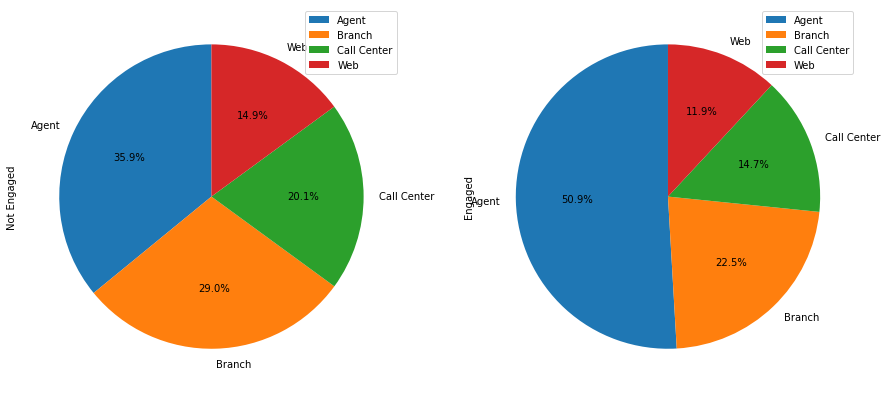

In [23]:
# Visualize the Engagement by Sales Channels
engagement_by_sales_channel_df.plot(
kind='pie',
figsize=(15,7),
startangle=90,
subplots=True,
autopct=lambda x:'%0.1f%%' %x)
plt.show()

In [15]:
# Exploring the Coverage
engagement_by_coverage_df = pd.pivot_table(
df, values='Response', index='Coverage', columns='Engaged', aggfunc=len).fillna(0)

In [18]:
# Rename the columns 
engagement_by_coverage_df.columns =['Not Engaged','Engaged']
engagement_by_coverage_df

,Not Engaged,Engaged
Coverage,,
Basic,4770,798
Extended,2352,390
Premium,704,120


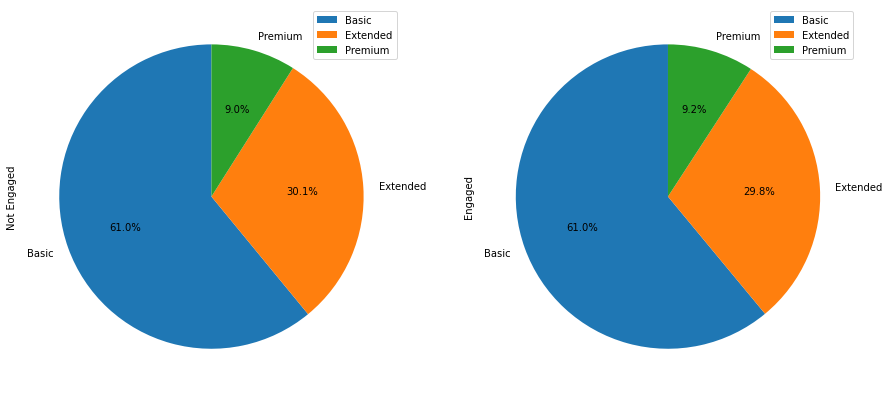

In [24]:
# Visualize Engagement by Coverage
engagement_by_coverage_df.plot(
kind='pie',
figsize=(15,7),
startangle=90,
subplots=True,
autopct=lambda x:'%0.1f%%' %x)
plt.show()

/Users/jacob/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


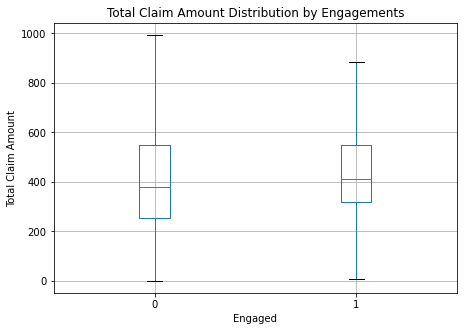

In [28]:
# Total Claim Amounts
# This is to find the differences in the distribution of Total Claim between the engaged and non-engaged
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
by='Engaged', showfliers=False,
figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distribution by Engagements')

plt.suptitle("")
plt.show()

## Regression Analysis

In [29]:
# find the summary of all the continous variable of the data
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [52]:
# separate continous variable from categorical variable
continuous_vars = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception',
            'Number of Open Complaints','Number of Policies','Total Claim Amount','Engaged']

In [49]:
ML_df = df[['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception',
            'Number of Open Complaints','Number of Policies','Total Claim Amount','Engaged']]

In [51]:
# Separate target from features 
X = ML_df.drop(columns='Engaged')
y = ML_df.Engaged

In [58]:
# Split training/test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, stratify=y)

In [61]:
# Standardize the data
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

#scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
# Instatiate logistic regression
logit = LogisticRegression(solver='lbfgs', max_iter=200)

In [63]:
# Train the model
logit.fit(X_train,y_train)

# Evaluate the model
y_pred = logit.predict(X_test)
print(f" Logistic Regression Model Accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic Regression Model Accuracy: 0.857


In [78]:
logit.coef_

array([[-8.52726311e-06, -4.03249842e-06, -8.83002255e-03,
        -2.37738587e-02, -6.68476344e-03, -7.96059128e-04,
        -6.32584589e-03, -1.07964484e-05]])

In [79]:
log = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [80]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                -0.02546
Time:                        17:05:27   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""